In [2]:
from IPython.display import display
import ipywidgets as widgets
import time

class Tablero:
  def __init__(self, tamano_celda=(50, 50), n_celdas=(5,5)):
    self.out = widgets.HTML()
    display(self.out)
    self.tamano_celda = tamano_celda
    self.n_celdas = n_celdas

  def dibujar(self, objetos):
    tablero = "<table border='1' >{}</table>"
    filas = ""

    for i in range(self.n_celdas[0]):
      s = ""
      for j in range(self.n_celdas[1]):
        contenido =""
        for o in objetos:
          if o.x == j and o.y == i:
            contenido = \
            "<div style='transform: rotate({angulo}deg);font-size:{tamano_emoticon}px;'>{emoticon}</div>".\
            format(angulo = o.angulo, tamano_emoticon = o.tamano_emoticon, emoticon = o.emoticon)
        s += "<td style='height:{alto}px;width:{ancho}px'>{contenido}</td>".\
          format(alto = self.tamano_celda[0], ancho = self.tamano_celda[1],
                contenido = contenido)
      filas += "<tr>{}</tr>".format(s)
    tablero = tablero.format(filas)
    self.out.value = tablero

In [3]:
class Agente:
    def __init__(self, x=0, y=0, angulo=0, emoticon="🤖", tamano_emoticon=30):
        self.x = x
        self.y = y
        self.angulo = angulo
        self.emoticon = emoticon
        self.tamano_emoticon = tamano_emoticon
        self.energia = 5

    def abajo(self):
        if self.y < 4:
            self.y += 1
            self.energia -= 1

    def derecha(self):
        if self.x < 4:
            self.x += 1
            self.energia -= 1

    def arriba(self):
        if self.y > 0:
            self.y -= 1
            self.energia -= 1

    def izquierda(self):
        if self.x > 0:
            self.x -= 1
            self.energia -= 1

In [4]:
def generarAgentesHoja (n_celdas=(5,5),n_hojas=10, angulo = 0, emoticon = "🍂", tamano_emoticon = 30):
    posiciones = set ()
    hojitas = list ()
    while len(posiciones) < n_hojas:
        pos_x = int(np.random.randint(0, n_celdas[0]))
        pos_y = int(np.random.randint(0, n_celdas[1]))
        pos = (pos_x, pos_y)
        if pos not in posiciones:
            hojitas.append(Agente(pos_x, pos_y, angulo, emoticon, tamano_emoticon))
            posiciones.add(pos)
    return hojitas

In [5]:
class AgenteReflejo(Agente):
    def __init__(self,  x=0, y=0, angulo=0, emoticon="🤖", tamano_emoticon=30, energia=5):
        """
        Inicializa los valores de la aspiradora
        """
        super().__init__(x,y,angulo,emoticon,tamano_emoticon)
        self.energia = energia
        self.puntaje = 0

    def hayHoja(self, las_hojas):
        """
        Compara la posicion actual de la aspiradora con la posicion de todas las hojas en el tablero,
        devuelve True si hay una hoja en la misma posicion de la aspiradora
        """
        aspiro = False
        for hoja in las_hojas:
            if hoja.x == self.x and hoja.y == self.y:
                las_hojas.remove(hoja)
                self.puntaje += 1
                aspiro = True
                break

        return aspiro


    def percibir(self, las_hojas):
        """
        percibe las hojas alrededor de la aspiradora y selecciona una al azar
        """
        percepcion = []
        for hoja in las_hojas:

            # si la hoja esta en el norte
            if hoja.x == self.x and hoja.y == self.y - 1:
                percepcion.append("N")
            # si la hoja esta en el sur
            if hoja.x == self.x and hoja.y == self.y + 1:
                percepcion.append("S")
            # si la hoja esta en el oeste
            if hoja.x == self.x - 1 and hoja.y == self.y:
                percepcion.append("W")
            # si la hoja esta en el este
            if hoja.x == self.x + 1 and hoja.y == self.y:
                percepcion.append("E")

        if len(percepcion) > 0 :
            return percepcion[0]
            # direccion = int(np.random.random()*len(percepcion))
            # return percepcion[direccion]
        else:
            direcciones = "NSWE"
            direccion = int(np.random.random()*4)
            return direcciones[direccion]

In [6]:
import numpy as np
import matplotlib.pylab as plt


def crearAspiradora(n_celdas=(5, 5), energia=100):
    """
    Genera una posicion aleatoria sobre el tablero en la cual se ubicara la aspiradora

    Args:
        n_celdas: una tupla que establece el tamaño del tablero
        energia: la cantidad de acciones que puede realizar la aspiradora
    Return:
        Posicion aleatoria en el tablero para ubicar la aspiradora
    """
    pos_x = int(np.random.random()*n_celdas[0])
    pos_y = int(np.random.random()*n_celdas[1])

    aspiradora = AgenteReflejo(x=pos_x, y=pos_y, energia=energia)

    return aspiradora

HTML(value='')

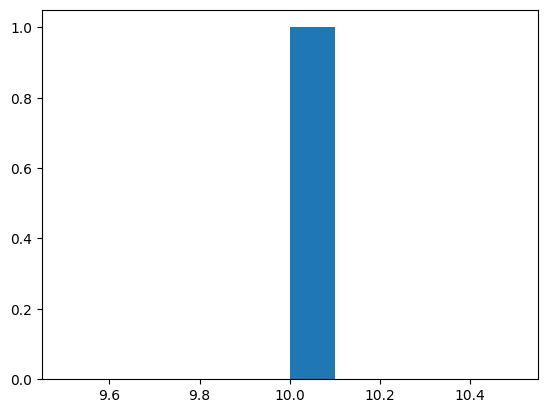

In [8]:
num_iteraciones = 1
puntajes= []

tablero = Tablero(n_celdas=(5, 5))

for i in range(num_iteraciones):

    #llama las dos funciones creadas anteriormente
    aspiradora = crearAspiradora()
    las_hojas = generarAgentesHoja()

    #crea el tablero con la cantidad de celdas necesarias y dibuja los objetos

    objetos = [aspiradora]
    objetos.extend(las_hojas)

    tablero.dibujar(objetos)

    # Si tiene energia se puede mover
    while aspiradora.energia > 0:
        # si la funcion percibe cerca se mueve hacia esa direccion
        if not aspiradora.hayHoja(las_hojas) :
            direccion = aspiradora.percibir(las_hojas)
            if direccion == "N":
                aspiradora.arriba()
            elif direccion == "S":
                aspiradora.abajo()
            elif direccion == "W":
                aspiradora.izquierda()
            elif direccion == "E":
                aspiradora.derecha()

            #actualiza las posiciones
            objetos = []
            objetos.extend(las_hojas)
            objetos.append(aspiradora)

        #dibuja las posiciones actualizadas
        tablero.dibujar(objetos)
        #cada movimiento tiene un delay
        time.sleep(0.5)

    # guardar el puntaje del agente
    puntajes.append(aspiradora.puntaje)

# pintar el histograma
plt.hist(puntajes)
plt.show()